# ANN
### Mar. 22 2022

## import modules & set random seed

In [ ]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import random
random.seed(42)
import sklearn 
from sklearn.metrics import r2_score

## import pytorch & set random seed

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(42)
from collections import OrderedDict

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

## projectile motion data generation & Split into training and testing set

In [ ]:
v_max = 500
spacing = 200

v_ini = np.linspace(0, v_max, spacing).reshape((spacing,1))
theta = np.linspace(0, np.pi, spacing).reshape((spacing,1))
v_ini_array = np.ones((spacing,spacing))
theta_array = np.ones((spacing,spacing))

for i in range(spacing):
  v_ini_array[i:i+spacing+1] = v_ini[i]
v_ini_array = v_ini_array.reshape(1,spacing*spacing)
# print(v_ini_array.shape)

for i in range(spacing):
  theta_array[i:i+spacing+1] = theta[i]
theta_array = theta_array.T.reshape(1,spacing*spacing)
# print(theta_array.shape)

dataXr = np.concatenate((v_ini_array, theta_array),axis = 0).T
print(dataXr.shape)

v_ini_hor = v_ini_array * np.cos(theta_array)
v_ini_ver = v_ini_array * np.sin(theta_array)
t = v_ini_ver / 9.8
height = 0.5 * 9.8 * t * t
length = v_ini_hor * t
dataYr = np.concatenate((height, length),axis = 0).T
print(dataYr.shape)

# concat. for later split
M = np.concatenate((dataXr,dataYr),axis=1)
# Shuffle matrix
np.random.shuffle(M)
# Split feature and target matrix (80%)
X = M[:, 0:M.shape[1]-2]
Y = M[:, M.shape[1]-2:M.shape[1]]

X_train = torch.from_numpy(X[0:int(X.shape[0]/5*4), :]).float().cuda().requires_grad_(True)
X_test = torch.from_numpy(X[int(X.shape[0]/5*4):X.shape[0], :]).float().cuda().requires_grad_(True)

Y_train = torch.from_numpy(Y[0:int(Y.shape[0]/5*4) ,:]).float().cuda().requires_grad_(True)
Y_test = torch.from_numpy(Y[int(Y.shape[0]/5*4):Y.shape[0] ,:]).float().cuda().requires_grad_(True)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(40000, 2)
(40000, 2)
torch.Size([32000, 2]) torch.Size([8000, 2])
torch.Size([32000, 2]) torch.Size([8000, 2])


## Model definition

In [ ]:
model = nn.Sequential(OrderedDict([
          ('linear1', nn.Linear(2,5,bias=True)),
          ('relu1', nn.ReLU()),
          ('linear2', nn.Linear(5,15,bias=True)),
          ('relu2', nn.ReLU()),
          ('linear3', nn.Linear(15,45,bias=True)),
          ('relu3', nn.ReLU()),
          ('linear4', nn.Linear(45,100,bias=True)),
          ('relu4', nn.ReLU()),
          ('linear5', nn.Linear(100,45,bias=True)),
          ('relu5', nn.ReLU()),
          ('linear6', nn.Linear(45,15,bias=True)),
          ('relu6', nn.ReLU()),
          ('linear7', nn.Linear(15,5,bias=True)),
          ('relu7', nn.ReLU()),
          ('linear8', nn.Linear(5,2,bias=True)),
        ]))
model = model.cuda()
print(model)

Sequential(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=5, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=45, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=45, out_features=100, bias=True)
  (relu4): ReLU()
  (linear5): Linear(in_features=100, out_features=45, bias=True)
  (relu5): ReLU()
  (linear6): Linear(in_features=45, out_features=15, bias=True)
  (relu6): ReLU()
  (linear7): Linear(in_features=15, out_features=5, bias=True)
  (relu7): ReLU()
  (linear8): Linear(in_features=5, out_features=2, bias=True)
)


## loss function definition

In [ ]:
loss_fn = F.mse_loss

## optimizer definition

In [ ]:
opt = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

## model training
(RMSE is used in loss record instead of MSE)

0 / 1000000 ,  ,rmse= tensor(3785.0356, device='cuda:0', grad_fn=<PowBackward0>)


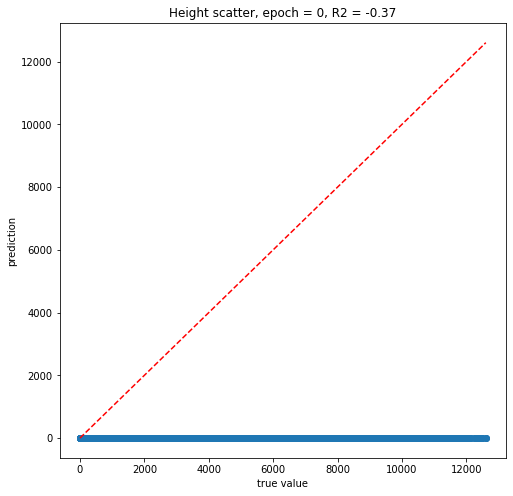

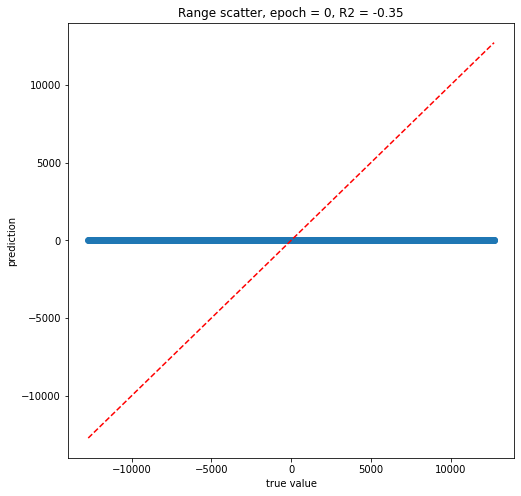

100000 / 1000000 ,  ,rmse= tensor(118.3417, device='cuda:0', grad_fn=<PowBackward0>)


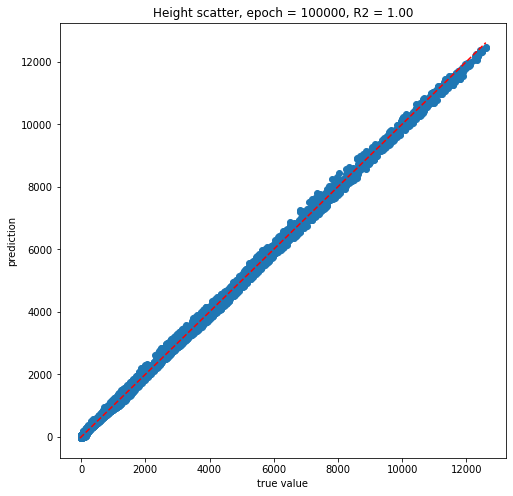

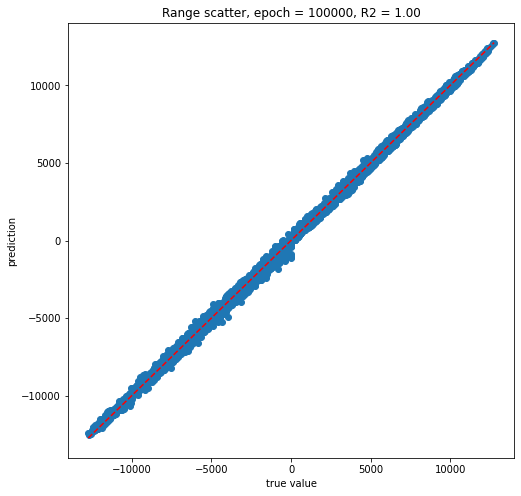

200000 / 1000000 ,  ,rmse= tensor(84.8511, device='cuda:0', grad_fn=<PowBackward0>)


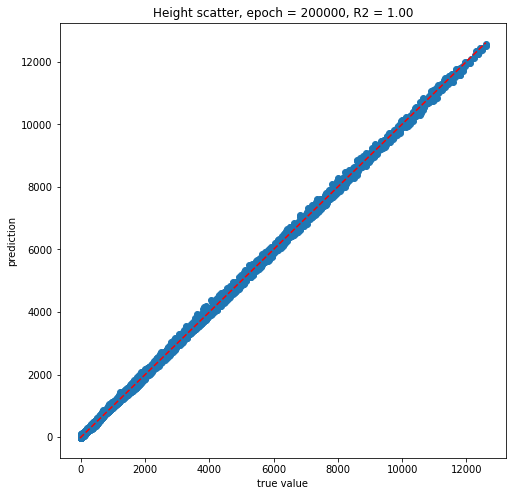

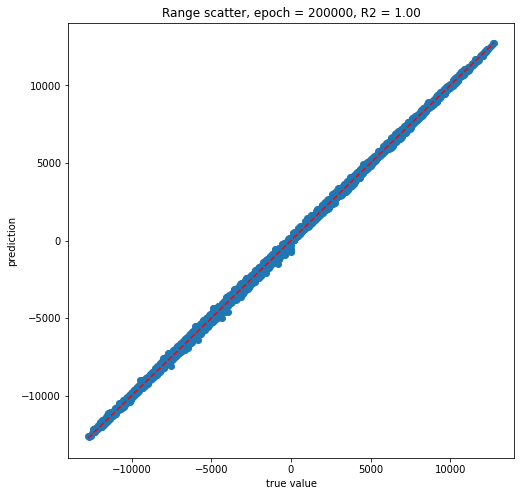

300000 / 1000000 ,  ,rmse= tensor(65.1738, device='cuda:0', grad_fn=<PowBackward0>)


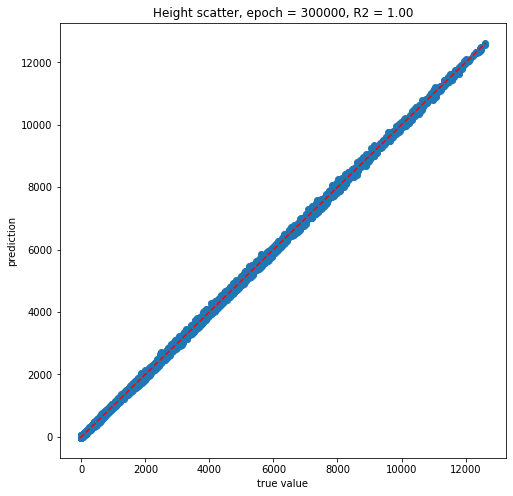

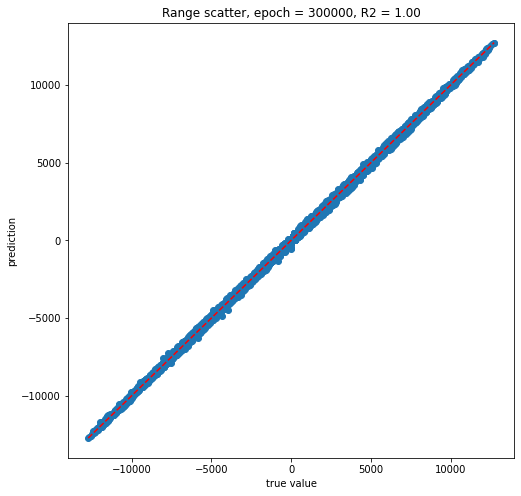

400000 / 1000000 ,  ,rmse= tensor(53.8915, device='cuda:0', grad_fn=<PowBackward0>)


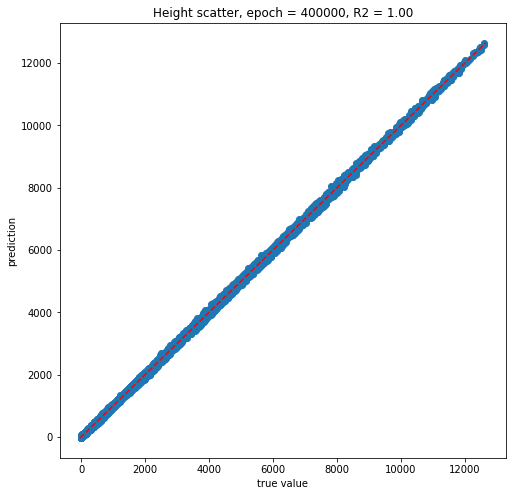

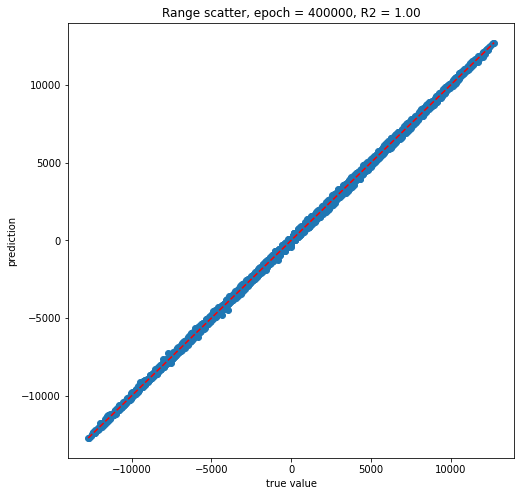

500000 / 1000000 ,  ,rmse= tensor(56.9434, device='cuda:0', grad_fn=<PowBackward0>)


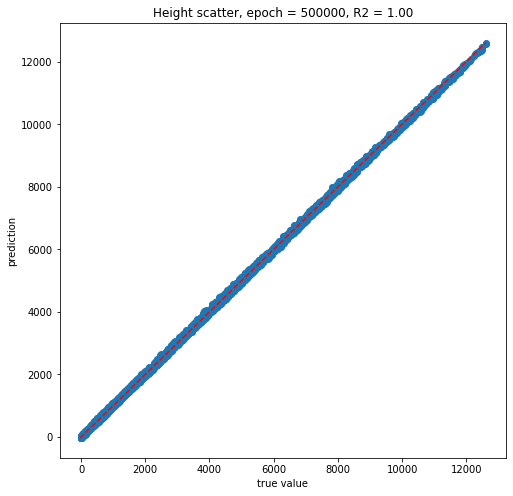

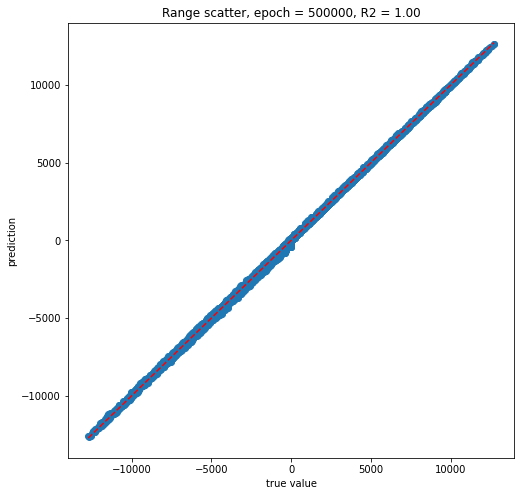

600000 / 1000000 ,  ,rmse= tensor(49.3705, device='cuda:0', grad_fn=<PowBackward0>)


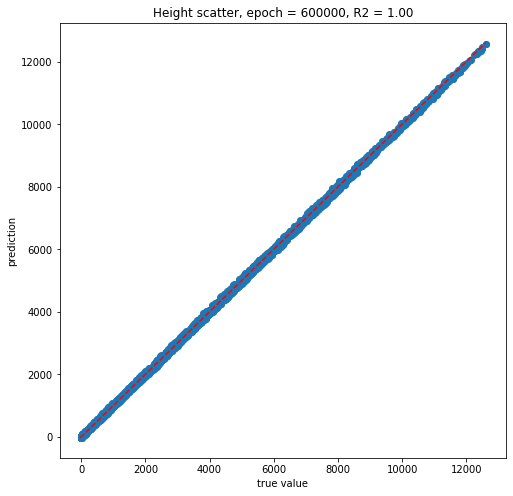

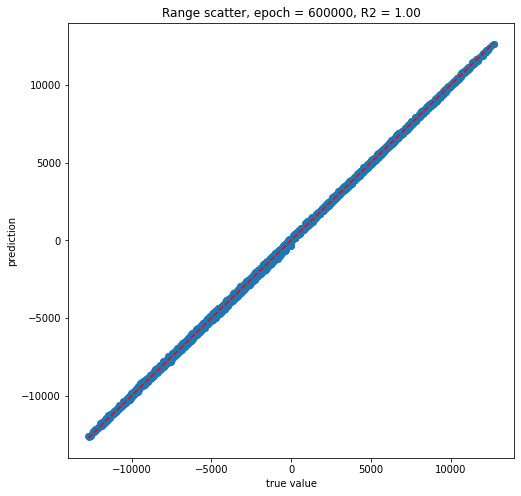

700000 / 1000000 ,  ,rmse= tensor(46.0181, device='cuda:0', grad_fn=<PowBackward0>)


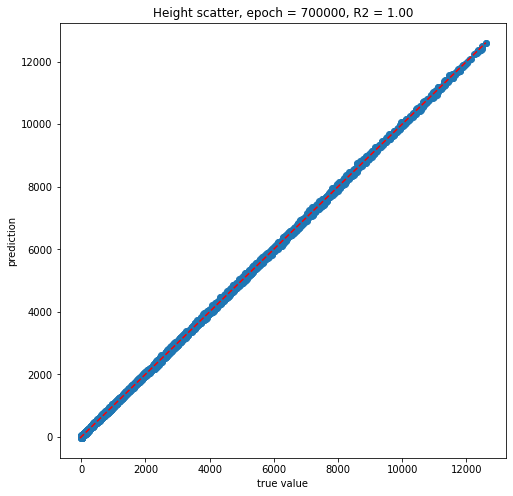

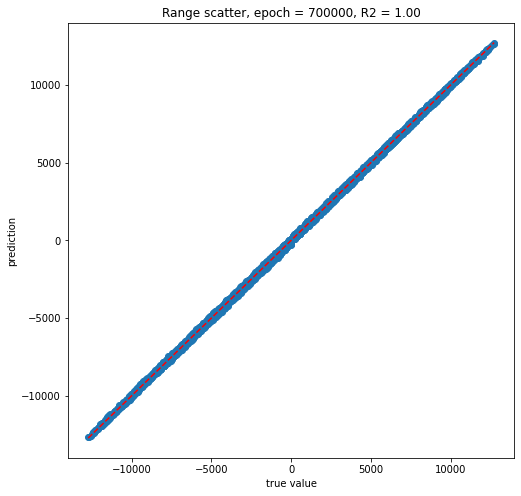

800000 / 1000000 ,  ,rmse= tensor(42.8289, device='cuda:0', grad_fn=<PowBackward0>)


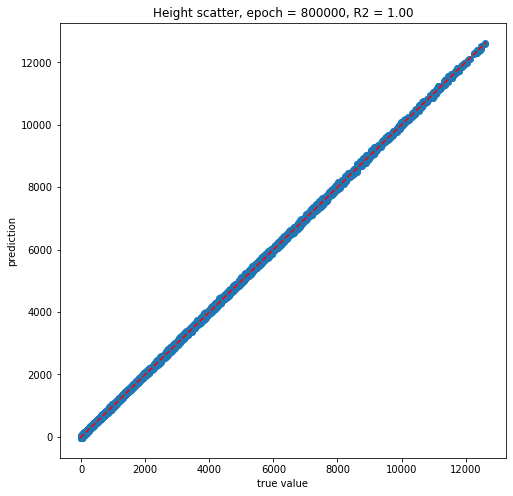

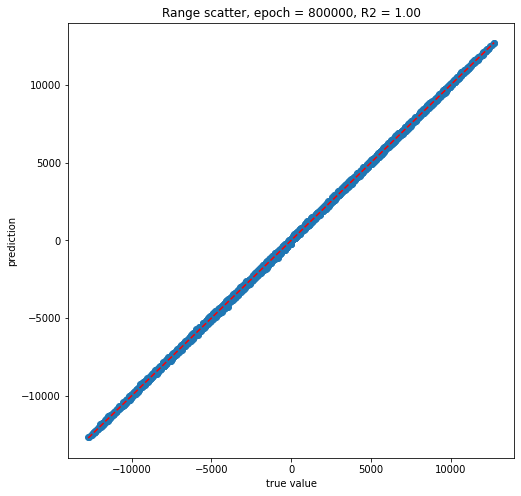

900000 / 1000000 ,  ,rmse= tensor(40.6962, device='cuda:0', grad_fn=<PowBackward0>)


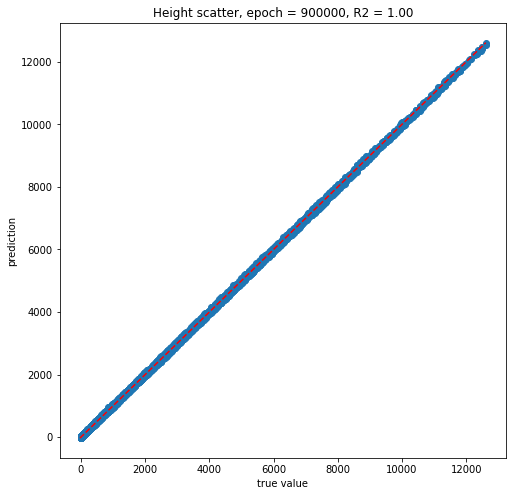

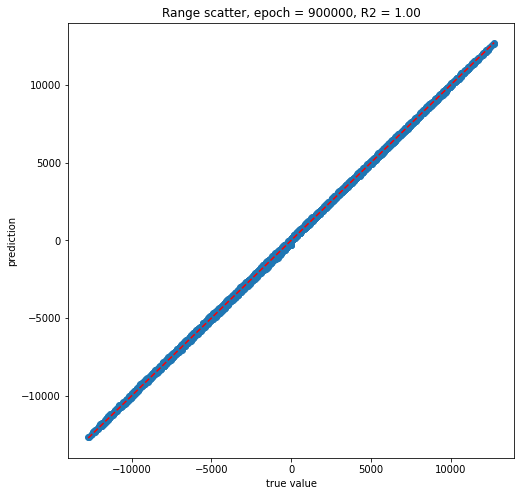

1000000 / 1000000 ,  ,rmse= tensor(37.7126, device='cuda:0', grad_fn=<PowBackward0>)


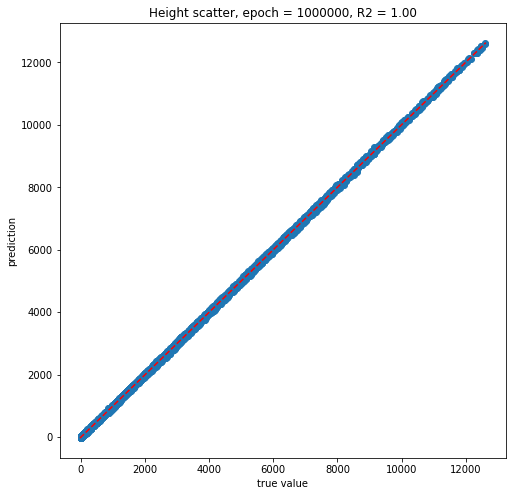

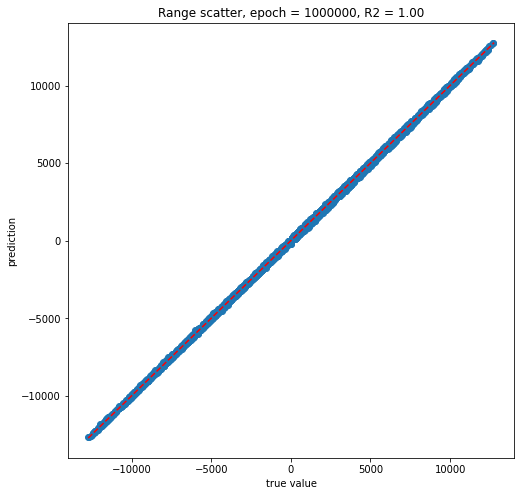

In [ ]:
t=1000000
loss_rec = np.ones(t+1)
error_rec = np.ones(t+1)
r_h_rec = np.ones(t+1)
r_r_rec = np.ones(t+1)

for i in range(t+1):
  opt.zero_grad()
  h = model(X_train)
  loss = loss_fn(h, Y_train)**0.5
  loss_rec[i] = loss
  loss.backward()
  opt.step()
  prediction = model(X_test)
  error_rec[i] = (loss_fn(prediction, Y_test)**0.5)
  prediction = model(X_test)
  prediction = prediction.cpu().detach().numpy()
  true_value = Y_test.cpu().detach().numpy()
  pre_h = prediction[0].tolist()
  pre_r = prediction[1].tolist()
  real_h = true_value[0].tolist()
  real_r = true_value[1].tolist()
  r_h = r2_score(real_h, pre_h)
  r_r = r2_score(real_r, pre_r)
  r_h_rec[i] = r_h
  r_r_rec[i] = r_r
  
  if (i%(t//10) == 0):
    print(i,'/',t,',  ,rmse=',loss)
    plt.rcParams["figure.figsize"] = (8, 8)
    plt.figure(i)
    H_real = Y_test[:,0]
    H_pre = prediction[:,0]
    H=np.append(H_real.cpu().detach().numpy().flatten(),H_pre.flatten())
    max_H = np.amax(H)
    min_H = np.amin(H)
    plt.scatter(H_real.cpu().detach().numpy(), H_pre)
    plt.plot([min_H,max_H],[min_H,max_H], color='red', linestyle='dashed')
    plt.xlabel('true value')
    plt.ylabel('prediction')
    plt.title('Height scatter, epoch = {}, R2 = {:.2f}'.format(i, r_h))

    plt.figure(i+1)
    R_real = Y_test[:,1]
    R_pre = prediction[:,1]
    R=np.append(R_real.cpu().detach().numpy().flatten(),R_pre.flatten())
    max_R = np.amax(R)
    min_R = np.amin(R)
    plt.scatter(R_real.cpu().detach().numpy(), R_pre)
    plt.plot([min_R,max_R],[min_R,max_R], color='red', linestyle='dashed')
    plt.xlabel('true value')
    plt.ylabel('prediction')
    plt.title('Range scatter, epoch = {}, R2 = {:.2f}'.format(i, r_r))
    plt.show()

## prediction error evaluation depending on the last trained model

In [ ]:
prediction = model(X_test)
error = (loss_fn(prediction, Y_test)**0.5)
prediction = prediction.cpu().detach().numpy()
print("error percentage =",error/spacing*spacing*100,"%")
true_value = Y_test.cpu().detach().numpy()
pre_h = prediction[0].tolist()
pre_r = prediction[1].tolist()
real_h = true_value[0].tolist()
real_r = true_value[1].tolist()
r_h = r2_score(real_h, pre_h)
r_r = r2_score(real_r, pre_r)

print(r_h, r_r)

error percentage = tensor(3826.8081, device='cuda:0', grad_fn=<MulBackward0>) %
0.9999571890509544 0.9998524970920114


## loss/error image generation

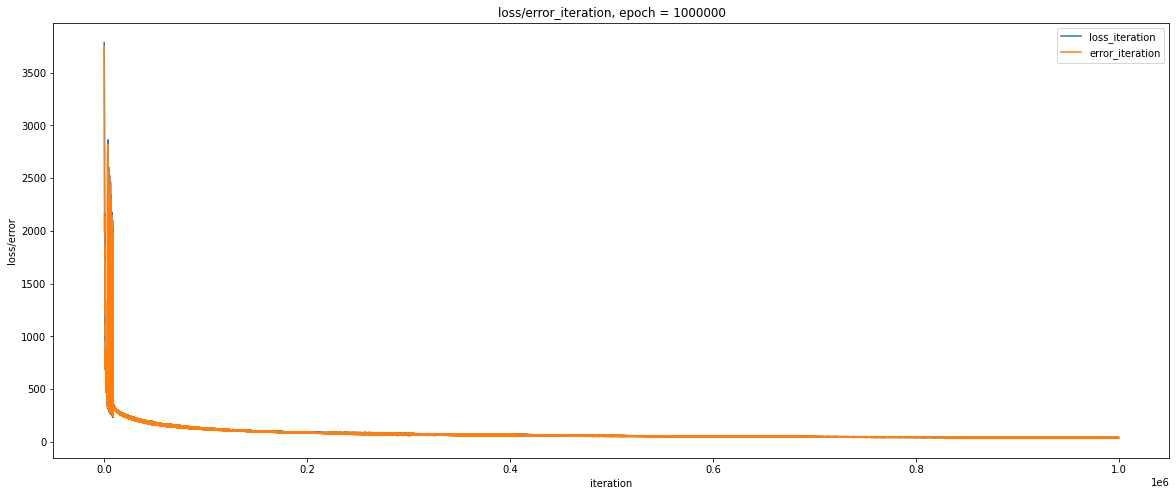

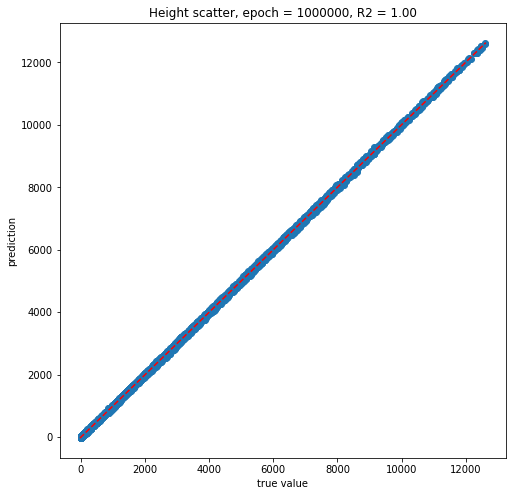

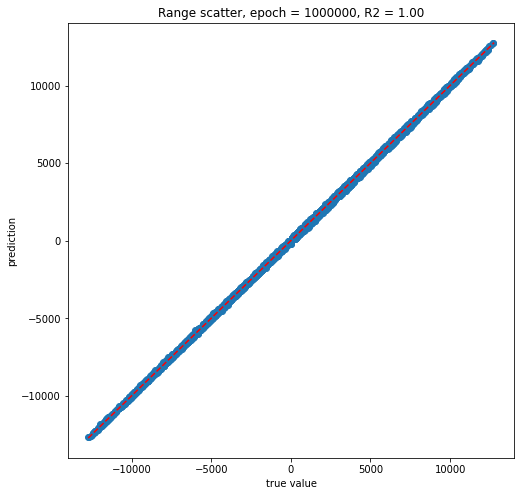

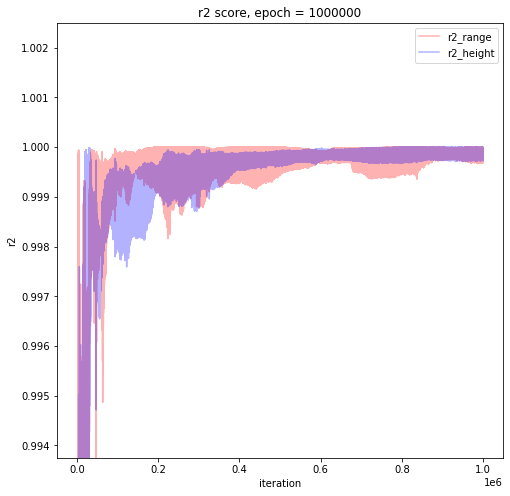

In [ ]:
plt.rcParams["figure.figsize"] = (20, 8)

plt.figure(0)
plt.plot(loss_rec, label='loss_iteration')
plt.plot(error_rec, label='error_iteration')
plt.xlabel('iteration')
plt.ylabel('loss/error')
plt.title('loss/error_iteration, epoch = {}'.format(t))
plt.legend()


plt.rcParams["figure.figsize"] = (8, 8)
plt.figure(2)
H_real = Y_test[:,0]
H_pre = prediction[:,0]
H=np.append(H_real.cpu().detach().numpy().flatten(),H_pre.flatten())
max_H = np.amax(H)
min_H = np.amin(H)
plt.scatter(H_real.cpu().detach().numpy(), H_pre)
plt.plot([min_H,max_H],[min_H,max_H], color='red', linestyle='dashed')
plt.xlabel('true value')
plt.ylabel('prediction')
plt.title('Height scatter, epoch = {}, R2 = {:.2f}'.format(t, r_h))

plt.figure(3)
R_real = Y_test[:,1]
R_pre = prediction[:,1]
R=np.append(R_real.cpu().detach().numpy().flatten(),R_pre.flatten())
max_R = np.amax(R)
min_R = np.amin(R)
plt.scatter(R_real.cpu().detach().numpy(), R_pre)
plt.plot([min_R,max_R],[min_R,max_R], color='red', linestyle='dashed')
plt.xlabel('true value')
plt.ylabel('prediction')
plt.title('Range scatter, epoch = {}, R2 = {:.2f}'.format(t, r_r))


plt.figure(1)
ax = plt.gca()
ax.set_ylim([0.99375, 1.0025])

plt.plot(r_r_rec, 'r-', alpha=0.3, label='r2_range')
plt.plot(r_h_rec, 'b-', alpha=0.3, label='r2_height')
plt.xlabel('iteration')
plt.ylabel('r2')
plt.title('r2 score, epoch = {}'.format(t))
plt.legend()


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
torch.save(model, "/content/gdrive/My Drive/entire_model.pt")

In [ ]:
x_ert = np.array([[300,1], [600, 3], [200, 4], [800, 6]])
x_ext = torch.from_numpy(x_ert).float().cuda()
y_ext = model(x_ext)
print(y_ext)

tensor([[  3235.8940,   4208.4995],
        [  1209.5385, -10182.2676],
        [   389.8873,   1164.9780],
        [  -583.7115,   3125.9675]], device='cuda:0', grad_fn=<AddmmBackward0>)
